In [8]:
#Install and load libraries
library(readr)
library(dplyr)

In [15]:
setwd("~")

In [16]:
#Upload summary file

assembly_summary_complete_data <- read_delim("microbiota_sialylation/genomes_download/assembly_complete_summary.tsv", 
                                           delim = "\t", escape_double = FALSE, 
                                           trim_ws = TRUE, col_names = FALSE)
head(assembly_summary_complete_data)

Rows: 38181 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): X1, X2, X3, X4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
GCF_900128725.1,Buchnera aphidicola,strain=BCifornacula,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/128/725/GCF_900128725.1_BCifornacula_v1.0
GCF_003044255.1,Shewanella putrefaciens,strain=WS13,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/044/255/GCF_003044255.1_ASM304425v1
GCF_016406325.1,Shewanella putrefaciens,strain=ATCC 8071,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/016/406/325/GCF_016406325.1_ASM1640632v1
GCF_017068195.1,Shewanella putrefaciens,strain=XY07,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/017/068/195/GCF_017068195.1_ASM1706819v1
GCF_009730575.1,Shewanella putrefaciens,strain=FDAARGOS_681,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/730/575/GCF_009730575.1_ASM973057v1
GCF_025402875.1,Shewanella putrefaciens,strain=4H,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/025/402/875/GCF_025402875.1_ASM2540287v1


In [18]:
#Put columm names
colnames(assembly_summary_complete_data) <- c("ID", "species_name", "species_lineage", "link_download")
#extract ID columm
columm_ID_assembly_complete <- assembly_summary_complete_data[,1]
colnames(columm_ID_assembly_complete) <- "refseq-accession"
head(columm_ID_assembly_complete)

refseq-accession
<chr>
GCF_900128725.1
GCF_003044255.1
GCF_016406325.1
GCF_017068195.1
GCF_009730575.1
GCF_025402875.1


In [19]:
#Save file
write_tsv(columm_ID_assembly_complete, "microbiota_sialylation/genomes_download/assembly_summary_complete_ID.txt")

In [20]:
#checkM info file upload
CheckM_report_prokaryotes <- read_delim("microbiota_sialylation/genomes_download/CheckM_report_prokaryotes.txt", 
                                        delim = "\t", escape_double = FALSE, 
                                        trim_ws = TRUE)
head(CheckM_report_prokaryotes)

Rows: 351119 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): #genbank-accession, refseq-accession, organism-name, species-name, ...
dbl (4): taxid, species-taxid, checkm-completeness, checkm-contamination

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#genbank-accession,refseq-accession,taxid,species-taxid,organism-name,species-name,assembly-name,checkm-completeness,checkm-contamination,checkm-marker-set
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
GCA_000005845.2,GCF_000005845.2,511145,562,Escherichia coli str. K-12 substr. MG1655,Escherichia coli,ASM584v2,99.48,0.15,Escherichia coli
GCA_000006765.1,GCF_000006765.1,208964,287,Pseudomonas aeruginosa PAO1,Pseudomonas aeruginosa,ASM676v1,99.61,0.49,Pseudomonas aeruginosa
GCA_000006805.1,GCF_000006805.1,64091,2242,Halobacterium salinarum NRC-1,Halobacterium salinarum,ASM680v1,99.05,0.22,Halobacterium
GCA_000006925.2,GCF_000006925.2,198214,623,Shigella flexneri 2a str. 301,Shigella flexneri,ASM692v2,97.22,0.47,Shigella flexneri
GCA_000007605.1,GCF_000007605.1,227941,83557,Chlamydia caviae GPIC,Chlamydia caviae,ASM760v1,98.67,0.23,Chlamydia
GCA_000008505.1,GCF_000008505.1,281309,1428,[Bacillus thuringiensis] serovar konkukian str. 97-27,Bacillus thuringiensis,ASM850v1,99.44,0.32,Bacillus thuringiensis


In [21]:
#Filter lines

filtered_lines_complete <- CheckM_report_prokaryotes%>%semi_join(columm_ID_assembly_complete, by = "refseq-accession")
View(filtered_lines_complete)
dim(filtered_lines_complete)

#extract lines that did not matched
remain_lines_complete <- anti_join(columm_ID_assembly_complete, filtered_lines_complete, by = "refseq-accession")
dim(remain_lines_complete)

write_delim(remain_lines_complete, "GCF_complete_without_checkM.txt")

#genbank-accession,refseq-accession,taxid,species-taxid,organism-name,species-name,assembly-name,checkm-completeness,checkm-contamination,checkm-marker-set
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
GCA_000005845.2,GCF_000005845.2,511145,562,Escherichia coli str. K-12 substr. MG1655,Escherichia coli,ASM584v2,99.48,0.15,Escherichia coli
GCA_000006765.1,GCF_000006765.1,208964,287,Pseudomonas aeruginosa PAO1,Pseudomonas aeruginosa,ASM676v1,99.61,0.49,Pseudomonas aeruginosa
GCA_000006925.2,GCF_000006925.2,198214,623,Shigella flexneri 2a str. 301,Shigella flexneri,ASM692v2,97.22,0.47,Shigella flexneri
GCA_000007605.1,GCF_000007605.1,227941,83557,Chlamydia caviae GPIC,Chlamydia caviae,ASM760v1,98.67,0.23,Chlamydia
GCA_000008505.1,GCF_000008505.1,281309,1428,[Bacillus thuringiensis] serovar konkukian str. 97-27,Bacillus thuringiensis,ASM850v1,99.44,0.32,Bacillus thuringiensis
GCA_000008725.1,GCF_000008725.1,272561,813,Chlamydia trachomatis D/UW-3/CX,Chlamydia trachomatis,ASM872v1,98.98,2.22,Chlamydia trachomatis
GCA_000009045.1,GCF_000009045.1,224308,1423,Bacillus subtilis subsp. subtilis str. 168,Bacillus subtilis,ASM904v1,98.62,1.32,Bacillus subtilis
GCA_000009085.1,GCF_000009085.1,192222,197,Campylobacter jejuni subsp. jejuni NCTC 11168 = ATCC 700819,Campylobacter jejuni,ASM908v1,99.59,0.25,Campylobacter jejuni
GCA_000009765.2,GCF_000009765.2,227882,33903,Streptomyces avermitilis MA-4680 = NBRC 14893,Streptomyces avermitilis,ASM976v2,99.91,1.17,Streptomyces


[1] 38134    10

[1] 47  1

In [11]:
#From this step follow the README file instructions in the topic 1.3
#After this, With the GCF_complete_without_checkM.txt file, do in the bash shell command line the command below to retreve remain data
# xargs -a GCF_complete_without_checkM.txt -I {} datasets summary genome accession {} --as-json-lines | dataformat tsv genome --fields organism-name,accession,checkm-completeness,checkm-contamination > remain_CheckM_data.tsv

#data will be saved in remain_CheckM_data.tsv file

# Part 02

In [23]:
#Upload file with missing data
remain_CheckM_data_complete <- read_delim("microbiota_sialylation/genomes_download/remain_CheckM_data_complete.tsv", 
                                 delim = "\t", escape_double = FALSE, 
                                 trim_ws = TRUE)
head(remain_CheckM_data_complete)

Rows: 47 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Organism Name, Assembly Accession
dbl (2): CheckM completeness, CheckM contamination

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Organism Name,Assembly Accession,CheckM completeness,CheckM contamination
<chr>,<chr>,<dbl>,<dbl>
Pseudomonas aeruginosa,GCF_024089375.1,94.28,0.49
Acinetobacter baumannii,GCF_008802935.1,95.92,1.16
Bordetella pertussis,GCF_022407395.1,96.45,0.43
Bordetella pertussis,GCF_022409195.1,94.19,0.89
Bordetella pertussis,GCF_022407335.1,95.74,0.89
Bordetella pertussis,GCF_022409595.1,92.95,0.96


In [24]:
#see if there is a NA value 
is.na(remain_CheckM_data_complete)

Organism Name,Assembly Accession,CheckM completeness,CheckM contamination
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


In [25]:
#the data has incomplete information with NAs, so we will take those ones, save in another file and then run CheckM separately in bash
#First, take lines with NA
remain_CheckM_data_complete_with_NA <- remain_CheckM_data_complete[!complete.cases(remain_CheckM_data_complete), ]
#take ID columm
remain_CheckM_data_complete_with_NA_ID <- remain_CheckM_data_complete_with_NA[,2]
#save file with only NA
write_tsv(remain_CheckM_data_complete_with_NA_ID, "microbiota_sialylation/genomes_download/remain_CheckM_data_complete_with_NA.tsv")

#Now, we will remove NAs from orginal data to merge after
remain_CheckM_data_complete_no_NA <- na.omit(remain_CheckM_data_complete)
#see if there is a NA value remaining
is.na(remain_CheckM_data_complete_no_NA)

Organism Name,Assembly Accession,CheckM completeness,CheckM contamination
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


In [26]:
#Filter data from filtered_lines and take completeness and contamination

filter_complete <- filtered_lines_complete[, c(2,8,9)]
head(filter_complete)

refseq-accession,checkm-completeness,checkm-contamination
<chr>,<dbl>,<dbl>
GCF_000005845.2,99.48,0.15
GCF_000006765.1,99.61,0.49
GCF_000006925.2,97.22,0.47
GCF_000007605.1,98.67,0.23
GCF_000008505.1,99.44,0.32
GCF_000008725.1,98.98,2.22


In [32]:
remain_CheckM2_data <- read_delim("microbiota_sialylation/genomes_download/checkm_result_ncbi/quality_report.tsv", 
                                 delim = "\t", escape_double = FALSE, 
                                 trim_ws = TRUE, col_names=c("Genome_ID", "Completeness", "Contamination"))
head(remain_CheckM2_data)

Rows: 4 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Genome_ID
dbl (2): Completeness, Contamination

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Genome_ID,Completeness,Contamination
<chr>,<dbl>,<dbl>
GCF_000146065.2_ASM14606v1_genomic,100.00000,1.09890110
GCF_000010245.2_ASM1024v1_genomic,99.96693,0.03720238
GCF_000967155.2_HUSEC2011CHR1_genomic,99.92873,0.14263937
GCF_000264665.3_ASM26466v2_genomic,99.91192,1.25048393


In [34]:
#filter columm to match
remain_CheckM2_data_filter <- select(remain_CheckM2_data, Genome_ID, Completeness, Contamination)
#rename columms
colnames(remain_CheckM2_data_filter) <- c("refseq-accession", "checkm-completeness", "checkm-contamination")
colnames(remain_CheckM_data_complete_no_NA) <- c("Organism_name", "refseq-accession", "checkm-completeness", "checkm-contamination")

#select desired columms
remain_CheckM_data_complete_no_NA_filter <- select(remain_CheckM_data_complete_no_NA, `refseq-accession`, `checkm-completeness`, `checkm-contamination`)
filter_complete_final <- select(filter_complete, `refseq-accession`, `checkm-completeness`, `checkm-contamination`)

#join data
join_contamination <- rbind(remain_CheckM_data_complete_no_NA_filter, remain_CheckM2_data_filter)

#join final data  with all completeness and contamination                                             
join_contamination_complete <- rbind(join_contamination, filter_complete_final) 
head(join_contamination_complete)

refseq-accession,checkm-completeness,checkm-contamination
<chr>,<dbl>,<dbl>
GCF_024089375.1,94.28,0.49
GCF_008802935.1,95.92,1.16
GCF_022407395.1,96.45,0.43
GCF_022409195.1,94.19,0.89
GCF_022407335.1,95.74,0.89
GCF_022409595.1,92.95,0.96


In [20]:
#load libraries and font
install.packages("ggplot2")
install.packages("extrafont")
library(ggplot2)
library(extrafont)
font_import(pattern = "Times") 
yloadfonts()

Installing package into ‘/home/edbvb97/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’


Installing package into ‘/home/edbvb97/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...



ERROR: Error in data.frame(fontfile = ttfiles, FontName = "", stringsAsFactors = FALSE): arguments imply differing number of rows: 0, 1


In [21]:
# Define the threshold   

threshold <- 10
threshold_completude <- 90

#Count how many meet the conditions
sum(join_contamination_complete$`checkm-contamination` < threshold & join_contamination_complete$`checkm-completeness` >= threshold_completude) #331671


# a data frame with all the annotation info
annotation_contamination_complete <- data.frame(
  x = c(115,30), 
  y = c(5, 22),
  label = c("36.353\n remain","1.828 left"))


[1] 36353

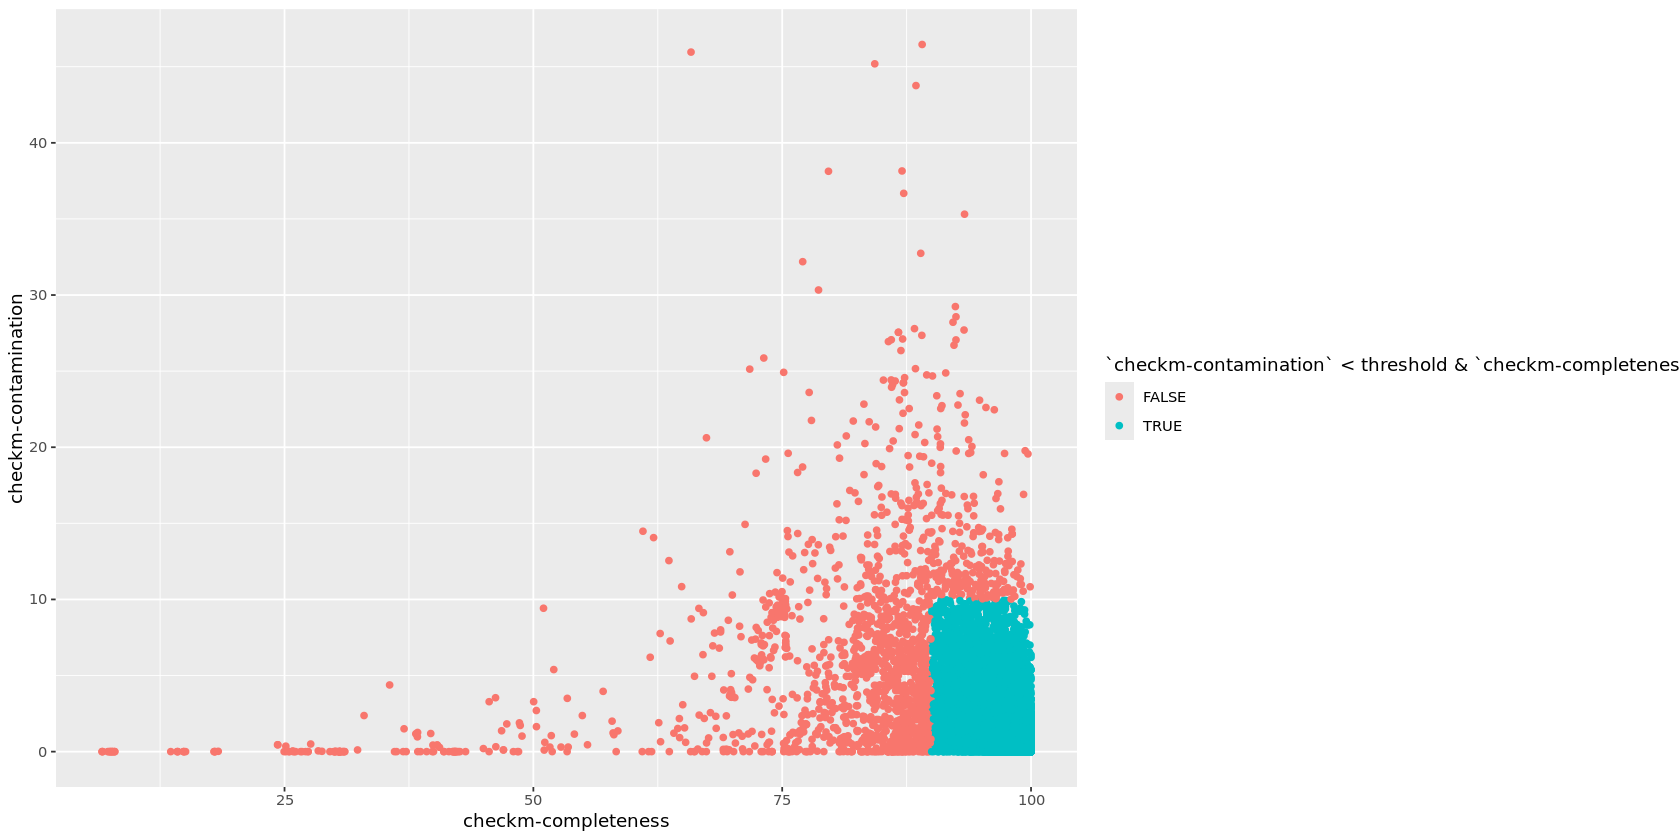

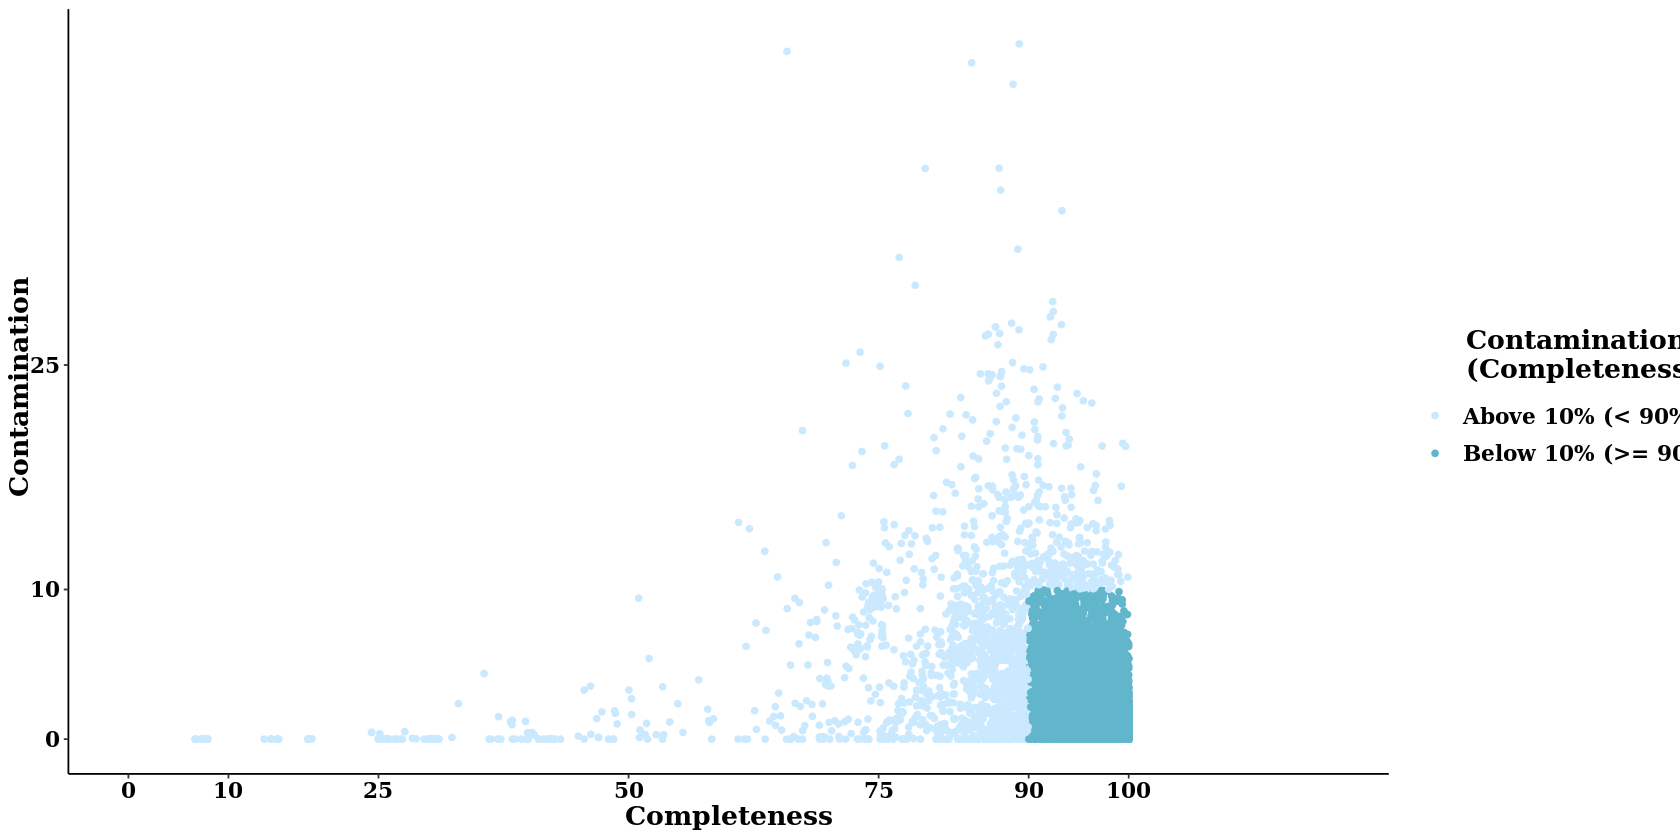

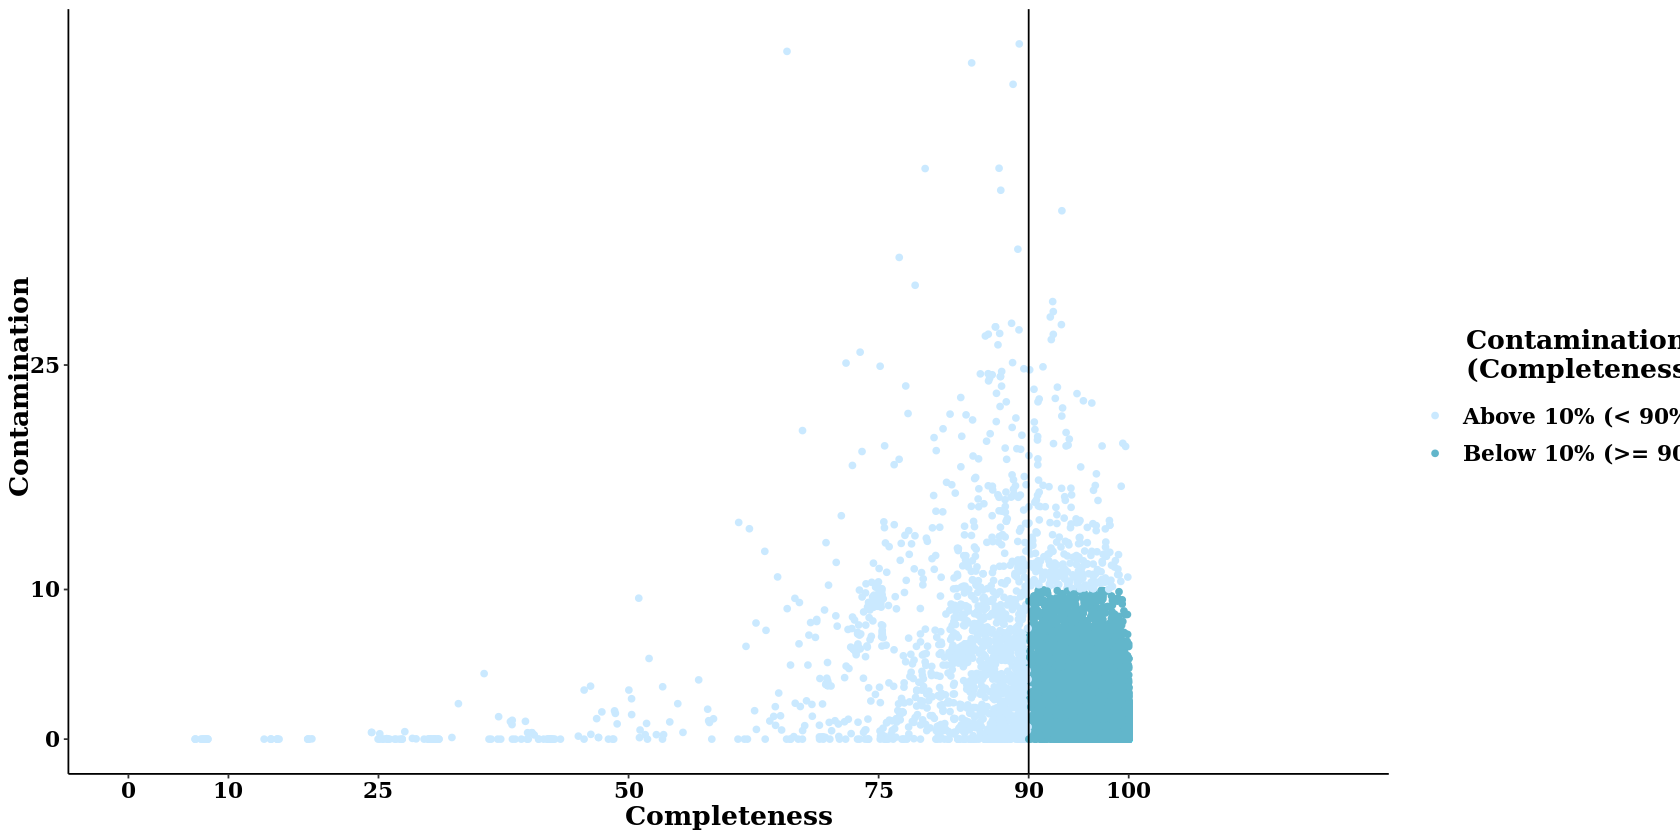

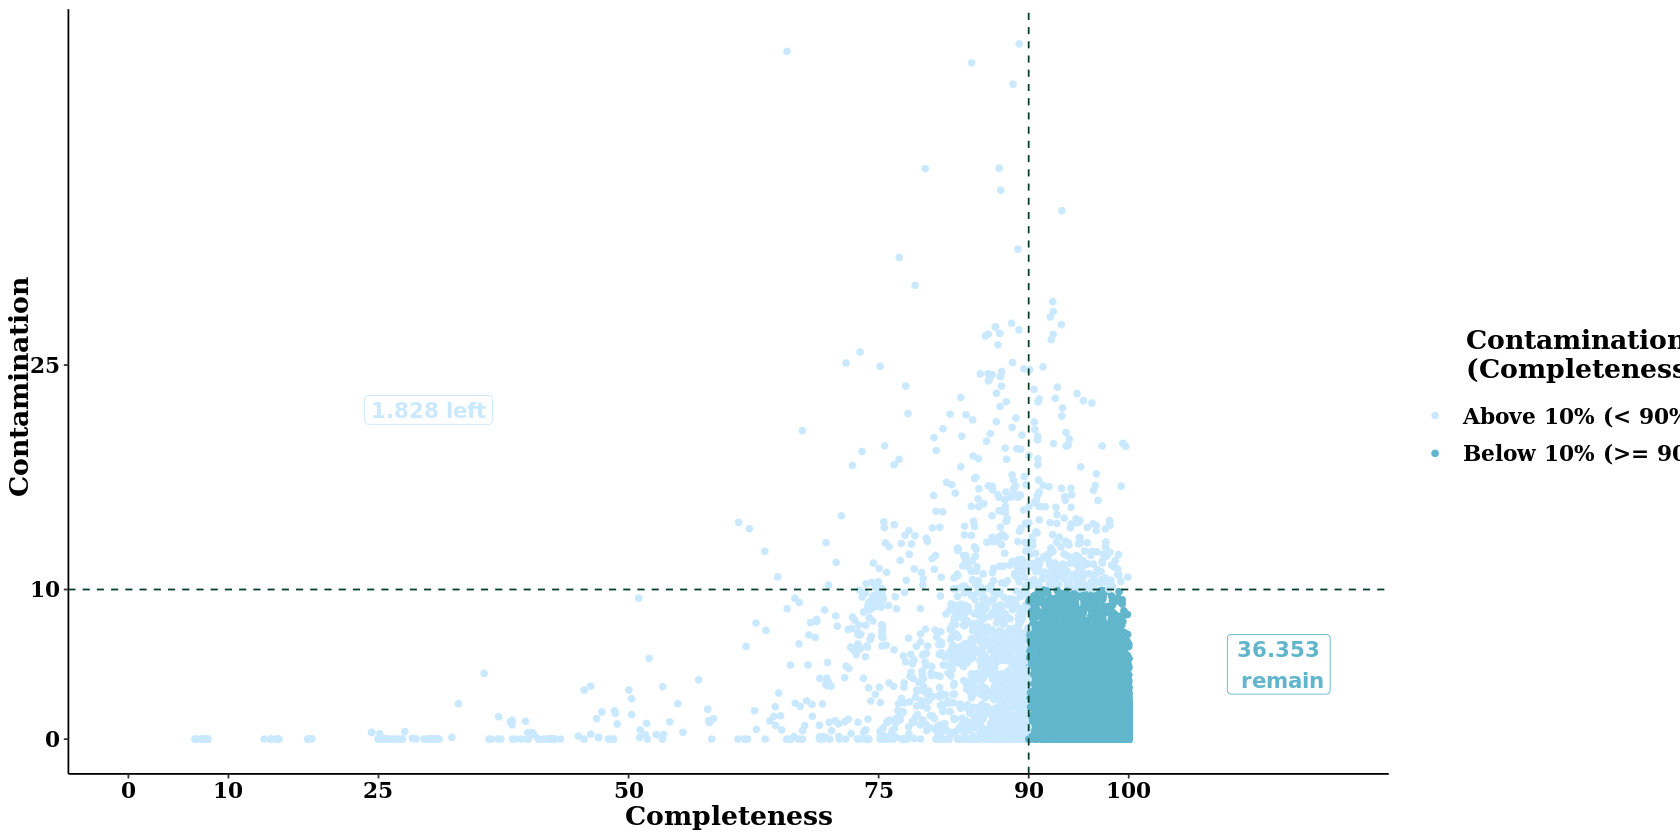

In [26]:
#ggplot graph
checkm_graph_v2_complete <- ggplot(join_contamination_complete, aes(x= `checkm-completeness`, y= `checkm-contamination`, color = `checkm-contamination` < threshold  & `checkm-completeness` >= threshold_completude )) + 
  geom_point() 


final_graph_v2_complete <-checkm_graph_v2_complete +  scale_color_manual(values = c("#CAE9FF", "#62B6CB"),name = "Contamination\n(Completeness)",
                                                       labels = c("Above 10% (< 90%)", "Below 10% (>= 90%)")) +
  theme_classic()+ theme(text = element_text(family = "Times", face = "bold", size = 16),
                         axis.text.y = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
                         axis.text.x = element_text(angle = 0, size = 13, colour = "black", family = "Times"),
                         legend.text=element_text(size=13, family = "Times"),
                         legend.key.size = unit(0.8, "cm"),
                         legend.title = element_text(margin= margin(t =10, r=0, b=10,l=30))) + scale_x_continuous(breaks = c(0, 10,25, 50, 75, 90, 100),
                                                                                                                  limits = c(0,120)) +
  scale_y_continuous(breaks = c(0,10, 25, 50)) + labs(x= "Completeness", y = " Contamination" )

options(repr.plot.width = 14, repr.plot.height = 7)
print(final_graph_v2_complete)

options(repr.plot.width = 14, repr.plot.height = 7)
final_graph_v2_complete + geom_vline(xintercept = 90)

options(repr.plot.width = 14, repr.plot.height = 7)
final_graph_v2_complete + geom_vline(xintercept = 90, color = "#06402B", linetype = "dashed")+
  geom_hline(yintercept=10, color = "#06402B", linetype = "dashed") + geom_label(data=annotation_contamination_complete,aes( x=x, y=y, label=label),                 , 
                                                                                 color=c("#62B6CB","#CAE9FF"), 
                                                                                 size=4.5 , angle=0, fontface="bold" )

In [23]:
#Final contamination and completeness analysis e filtering based on threshold to completeness and contamination

#sum(colunas_all_sp$V9 < threshold)
#right_one <-sum(colunas_all_sp$V8 >= threshold_completude)
complete_lines_complete <- join_contamination_complete[join_contamination_complete$`checkm-contamination` < threshold & join_contamination_complete$`checkm-completeness` >= threshold_completude, ]

View(complete_lines_complete)
#save file
write.table(complete_lines_complete, file = "checkm_filter_v2_complete.tsv", sep = "\t", col.names = TRUE)

refseq-accession,checkm-completeness,checkm-contamination
<chr>,<dbl>,<dbl>
GCF_024089375.1,94.28,0.49
GCF_008802935.1,95.58,1.12
GCF_022407395.1,96.77,0.45
GCF_022409195.1,94.19,0.89
GCF_022407335.1,95.74,0.89
GCF_022409595.1,92.95,0.96
GCF_032346775.1,97.89,3.38
GCF_020526825.1,99.13,0.15
GCF_020526805.1,99.13,0.15
